### 1. Introduction to SVM

SVM or Support Vector Machine is a supervised Machine Learning technique. It is used for classification, regression, and outlier detection.

Use SVM to build and train a model using human cell records and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

### 2. Perform Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 3. About the Cancer Data Set

Public Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) 
UCI Machine learning repository


### 4. Loading Data From CSV file

In [4]:
cancer_df = pd.read_csv('cell_samples.csv')

In [5]:
cancer_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
cancer_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign. 

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [9]:
cancer_df.shape

(699, 11)

In [10]:
cancer_df.size

7689

In [11]:
cancer_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [12]:
cancer_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### 5. Distribution of the Classes

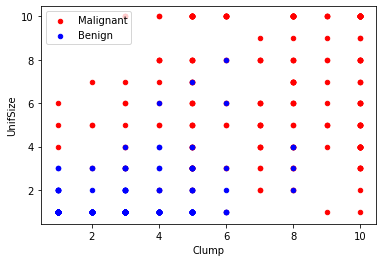

In [18]:
malignant_df = cancer_df[cancer_df['Class']==4][0:250]
benign_df = cancer_df[cancer_df['Class']==2][0:250]

axes = malignant_df.plot(kind='scatter', x ='Clump', y ='UnifSize', color ='Red', label='Malignant')

benign_df.plot(kind='scatter', x ='Clump', y ='UnifSize', color ='Blue', label='Benign', ax=axes)

### 6. Identifying unwanted rows

In [19]:
cancer_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [22]:
#discarding non numeric rows

cancer_df = cancer_df[pd.to_numeric(cancer_df['BareNuc'], errors = 'coerce').notnull()]

In [23]:
cancer_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [25]:
cancer_df['BareNuc'] = cancer_df['BareNuc'].astype('int')
cancer_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### 7. Remove unwanted columns

In [26]:
cancer_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [29]:
#Removed id and class

feature_df = cancer_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [32]:
X = np.asarray(feature_df)

#cancer_df had 100 rows and 11 columns
#feature_df had 9 columns out of the the nital 11 columns

#X is the independent variable

#dependent variable will be Y

Y = np.asarray(cancer_df['Class'])

In [33]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [34]:
Y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

### 8.Divide the data as Train/ Test dataset

In [37]:
'''
cancer_df --> Train/ Test
Train(X, y) #X is a 2D Array, #Y is a 1D array
Test(X,y)
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=4 )

In [38]:
X_train.shape

(546, 9)

In [40]:
y_train.shape

(546,)

### 9. Modelling (SVM with Scikit-learn)

In [43]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma ='auto', C=2) #defalut is RBF

In [44]:
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [45]:
y_predict = classifier.predict(X_test)

### 10. Evaluation (Results)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

